<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Loading-and-browsing-data" data-toc-modified-id="Loading-and-browsing-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading and browsing data</a></span></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory data analysis</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Model-selection" data-toc-modified-id="Model-selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model selection</a></span><ul class="toc-item"><li><span><a href="#Hyperparameters-tuning" data-toc-modified-id="Hyperparameters-tuning-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Hyperparameters tuning</a></span><ul class="toc-item"><li><span><a href="#GradientBoostingClassifier" data-toc-modified-id="GradientBoostingClassifier-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>GradientBoostingClassifier</a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>LGBMClassifier</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li><li><span><a href="#Results-comparsion" data-toc-modified-id="Results-comparsion-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Results comparsion</a></span></li></ul></li><li><span><a href="#Final-model-test" data-toc-modified-id="Final-model-test-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Final model test</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Heart failure fatality prediction model

## Introduction

**Heart failure** is a serious condition that affects millions of people worldwide and is a leading cause of death. The ability to predict patient outcomes, such as mortality, is essential for effective management of heart failure. In recent years, there has been growing interest in using machine learning algorithms to predict patient outcomes, including mortality. This is because machine learning algorithms can analyze large amounts of data and identify complex relationships that may be difficult for human experts to discern.

Implementing machine learning algorithms in predicting death from heart failure has the potential to improve patient outcomes by identifying patients who are at high risk of mortality and allowing healthcare professionals to intervene early to prevent adverse outcomes. Moreover, it can also help healthcare providers to allocate their resources effectively and efficiently.

Therefore, the purpose of this work is to review the current state of the use of popular gradient boosting machine learning algorithms in predicting death from heart failure, and to highlight the potential benefits and challenges of implementing these algorithms. By understanding the advantages and limitations of machine learning algorithms in predicting mortality, healthcare professionals can make informed decisions about how best to incorporate these algorithms into their practice.

Dataset is kindly provided on Kaggle: [CLICK HERE](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)

**Data described:**

<em>Target:</em>

-- `DEATH_EVENT` - The patient died (0 = No, 1 = Yes)

<em>Predictors:</em>
- `age` - Number of completed years of life

- `anaemia` - Decrease of red blood cells or hemoglobin (0 = No, 1 = Yes)

- `creatinine_phosphokinase` - Level of the CPK enzyme in the blood (mcg/L)

- `diabetes` - If the patient has diabetes (0 = No, 1 = Yes)

- `ejection_fraction` - Percentage of blood leaving the heart at each contraction (percentage)

- `high_blood_pressure` - If the patient has hypertension (0 = No, 1 = Yes)

- `platelets` - Platelets in the blood (kiloplatelets/mL)

- `serum_creatinine` - Level of serum creatinine in the blood (mg/dL)

- `serum_sodium` - Level of serum sodium in the blood (mEq/L)

- `sex` - Woman or man  (0 = W, 1 = M)

## Loading and browsing data

In [1]:
# load libraries
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.utils import compute_class_weight
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import balanced_accuracy_score, f1_score, recall_score, roc_auc_score
from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool, cv
    
# RandomState
seed = 12345

In [2]:
try:
    df= pd.read_csv('datasets/heart_failure_clinical_records_dataset.csv', sep=',')
except:
    print('Please download dataset directly from KAGGLE:')
    print('https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data')
    print()
    print('And place it into /datasets/ directory')

After the data is loaded, we will take a quick look at it, display basic information and descriptive statistics.

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Let's convert all column names to lowercase and drop `time` column since it indirectly points to the target.

In [6]:
df.columns= df.columns.str.lower()

df.drop('time', axis=1, inplace=True)

## Exploratory data analysis

Let's check distributions, target's scattering and correlations for everything.

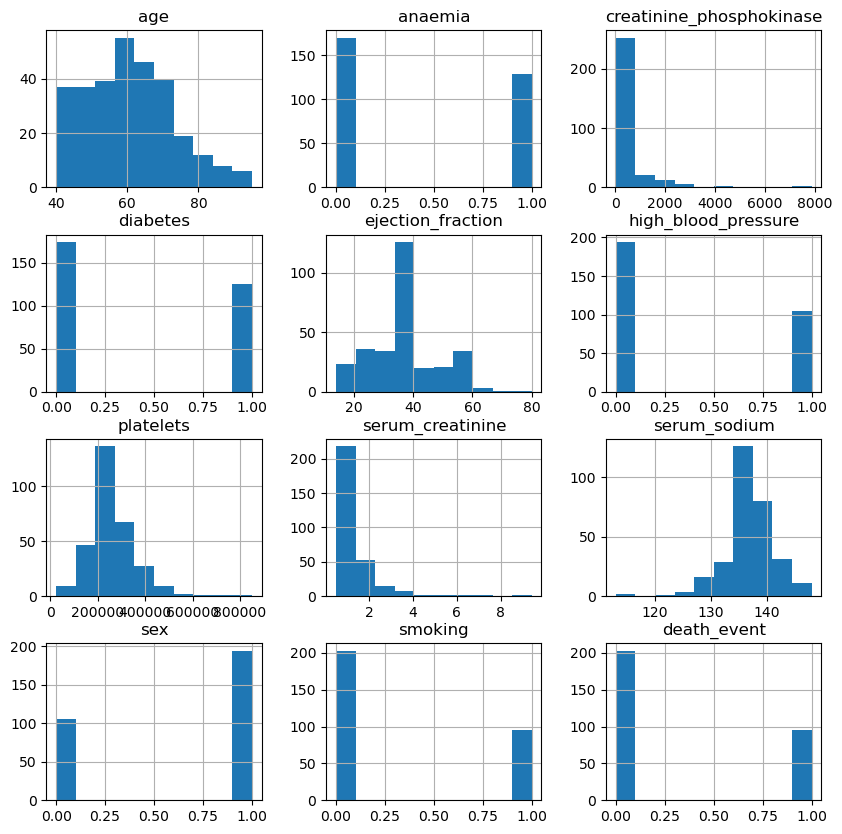

In [7]:
df.hist(figsize=(10, 10));

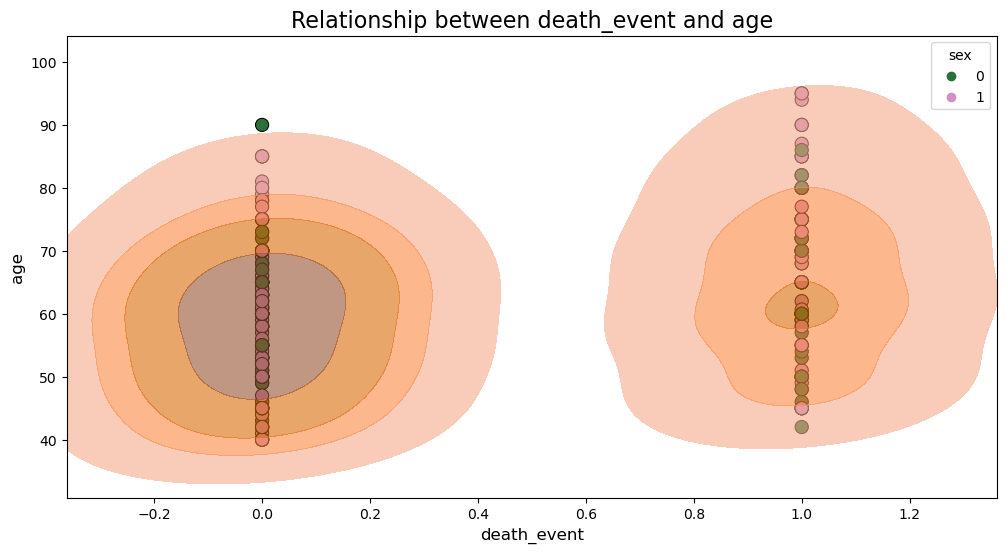

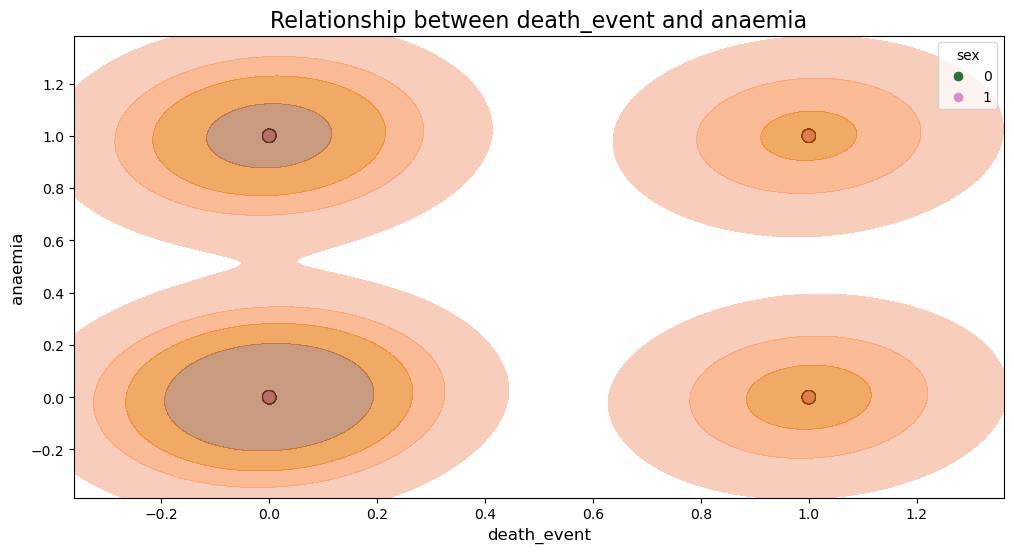

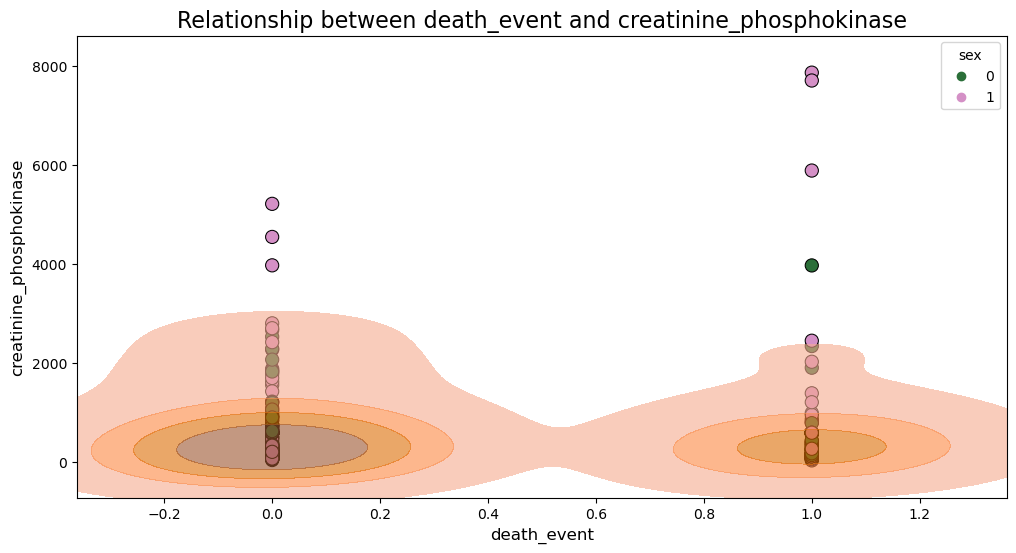

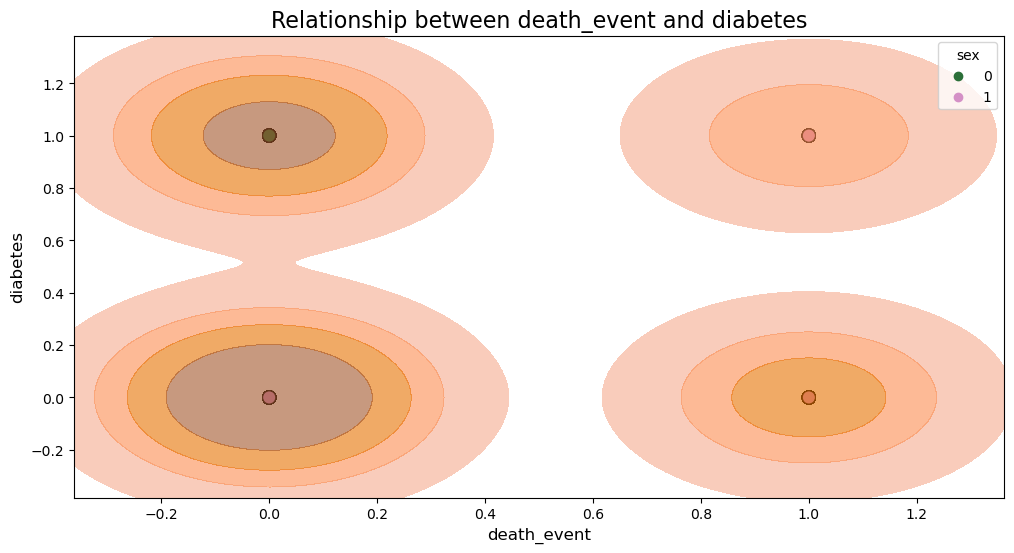

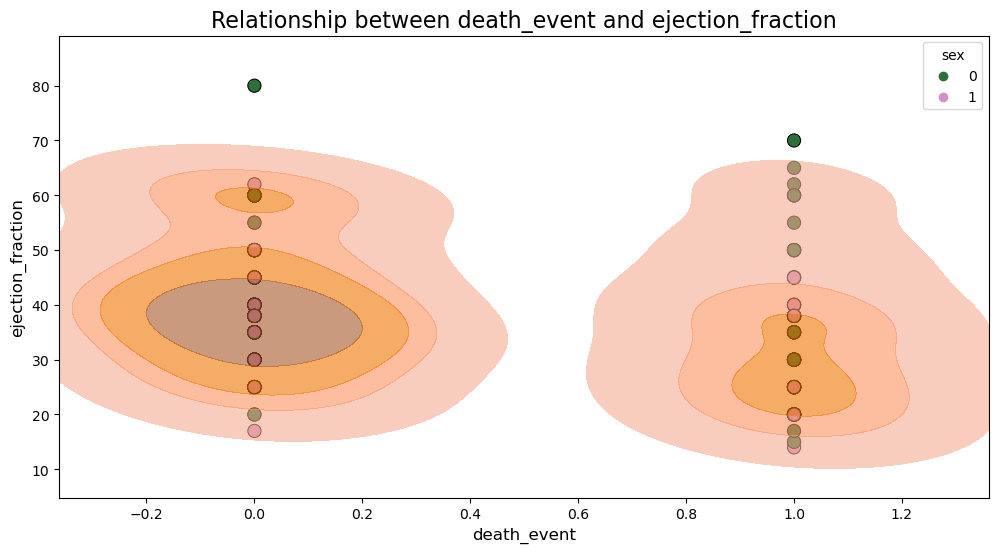

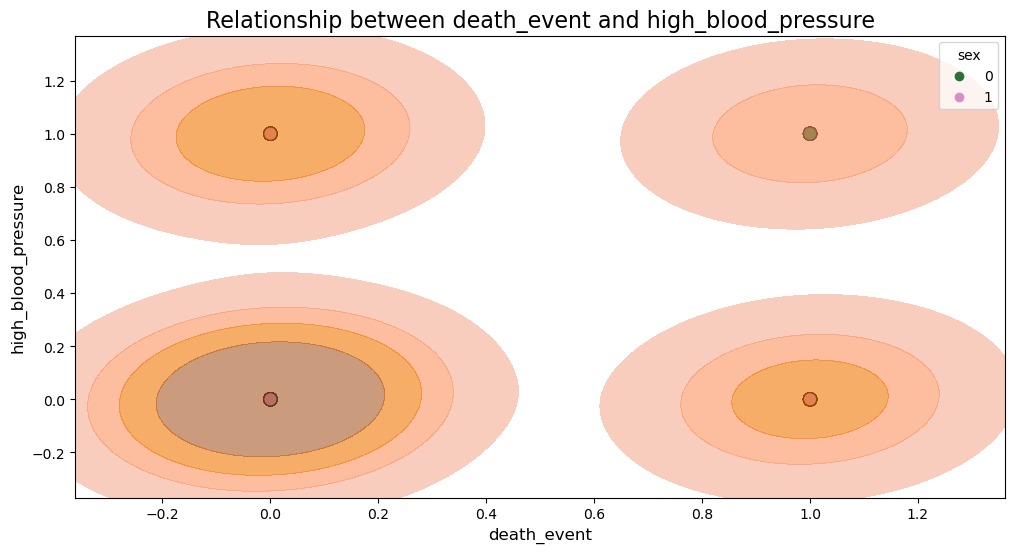

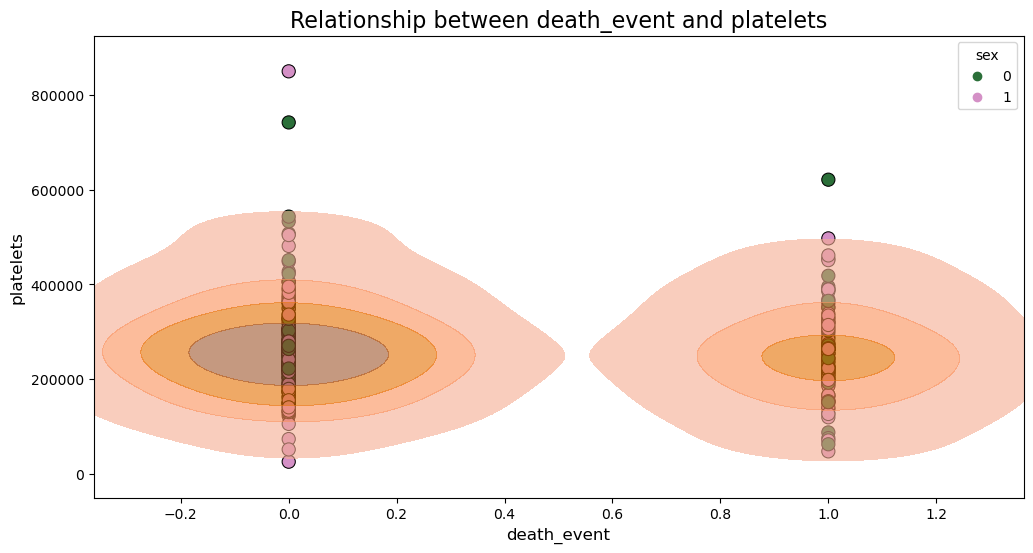

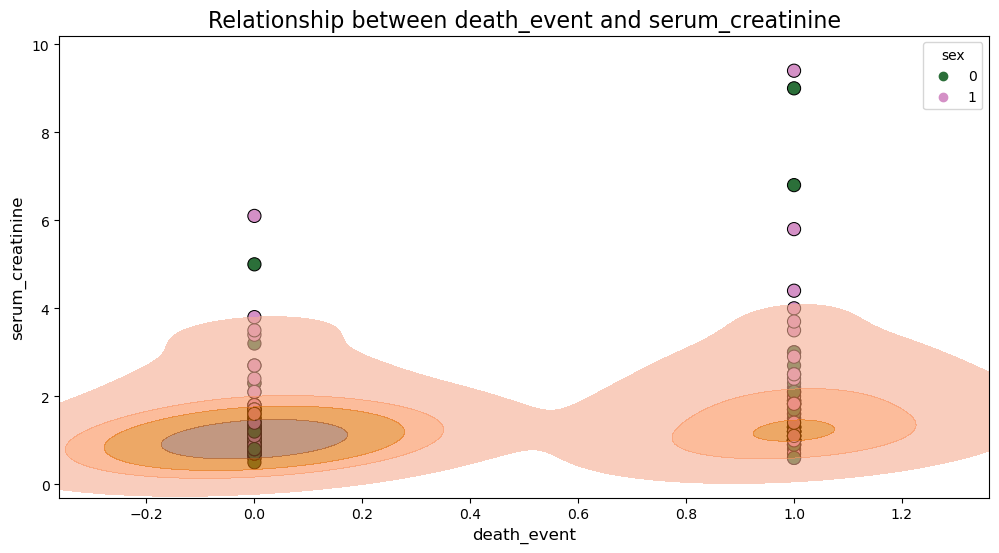

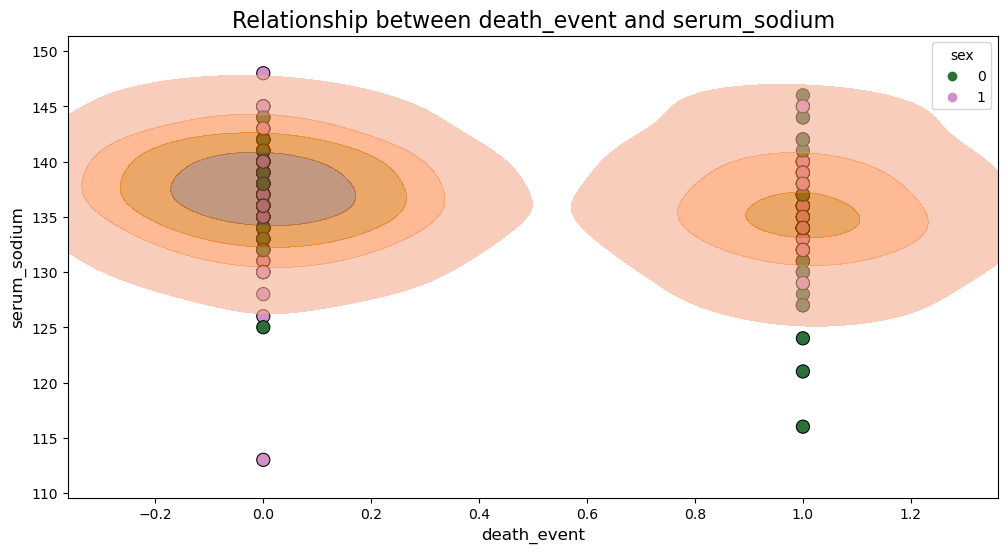

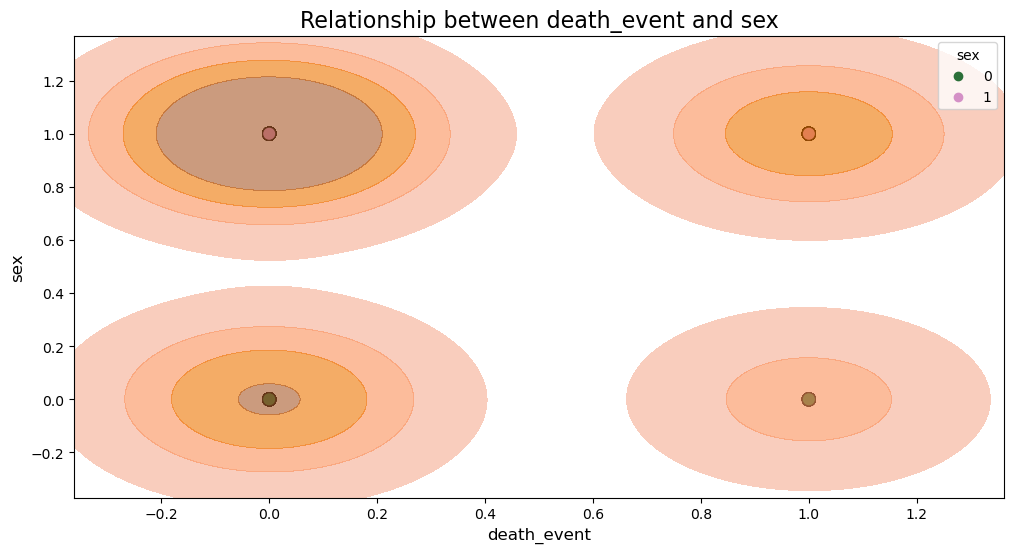

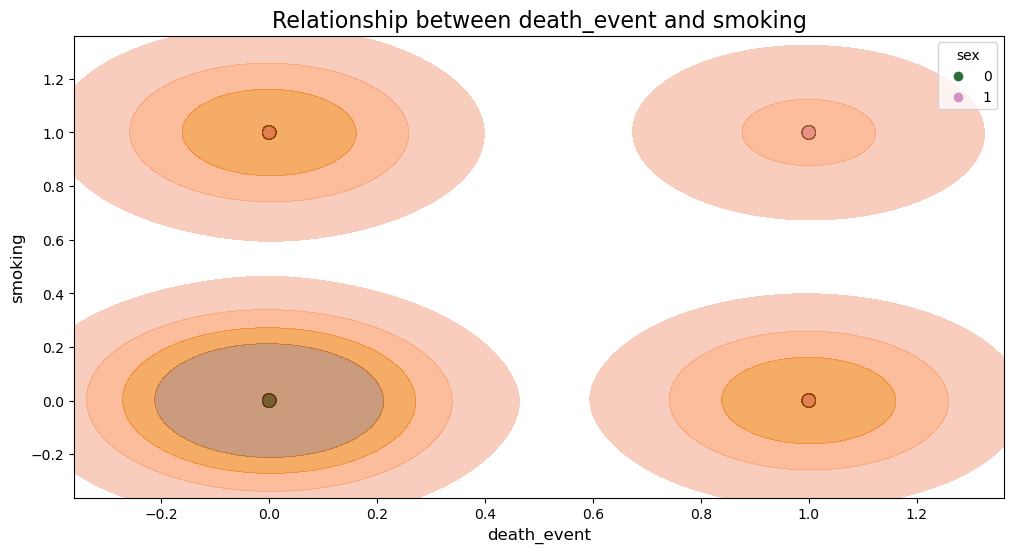

In [8]:
col_to_analyze = 'death_event'
for col in df:
    if (col != col_to_analyze):
        plt.figure(figsize=(12,6))
        plt.title(f'Relationship between {col_to_analyze} and {col}', size=16)
        plt.xlabel(col_to_analyze,size=12)
        plt.ylabel(col, size=12)
        sns.scatterplot(x=col_to_analyze,
                        y=col,
                        data=df,
                        hue='sex',
                        s=90, edgecolor='black',
                        palette='cubehelix',
                        hue_order=[0, 1])
        sns.kdeplot(data=df,
                    x=col_to_analyze,
                    y=col,
                    levels=5,
                    fill=True,
                    alpha=0.6,
                    cut=2)
        plt.show();

In [9]:
df.corr().round(2).style.background_gradient(cmap ='seismic').set_properties(**{'font-size': '10px'})

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,death_event
age,1.000000,0.090000,-0.080000,-0.100000,0.060000,0.090000,-0.050000,0.160000,-0.050000,0.070000,0.020000,0.250000
anaemia,0.090000,1.000000,-0.190000,-0.010000,0.030000,0.040000,-0.040000,0.050000,0.040000,-0.090000,-0.110000,0.070000
creatinine_phosphokinase,-0.080000,-0.190000,1.000000,-0.010000,-0.040000,-0.070000,0.020000,-0.020000,0.060000,0.080000,0.000000,0.060000
diabetes,-0.100000,-0.010000,-0.010000,1.000000,-0.000000,-0.010000,0.090000,-0.050000,-0.090000,-0.160000,-0.150000,-0.000000
ejection_fraction,0.060000,0.030000,-0.040000,-0.000000,1.000000,0.020000,0.070000,-0.010000,0.180000,-0.150000,-0.070000,-0.270000
high_blood_pressure,0.090000,0.040000,-0.070000,-0.010000,0.020000,1.000000,0.050000,-0.000000,0.040000,-0.100000,-0.060000,0.080000
platelets,-0.050000,-0.040000,0.020000,0.090000,0.070000,0.050000,1.000000,-0.040000,0.060000,-0.130000,0.030000,-0.050000
serum_creatinine,0.160000,0.050000,-0.020000,-0.050000,-0.010000,-0.000000,-0.040000,1.000000,-0.190000,0.010000,-0.030000,0.290000
serum_sodium,-0.050000,0.040000,0.060000,-0.090000,0.180000,0.040000,0.060000,-0.190000,1.000000,-0.030000,0.000000,-0.200000
sex,0.070000,-0.090000,0.080000,-0.160000,-0.150000,-0.100000,-0.130000,0.010000,-0.030000,1.000000,0.450000,-0.000000


We could point at some interesting correlations, like how sex associated with smoking, but that doesn't concern us. As we can see, most important features for us are `age`, `ejection_fraction`, `serum_creatinine` and `serum_sodium`.

## Data preparation

We won't remove any outliers and will just divide our data into subsamples.

In [10]:
x = df.drop('death_event', axis=1)
y = df['death_event']

x_train, x_test, y_train, y_test = \
train_test_split(x, 
                 y,
                 test_size=0.2,
                 random_state=seed,
                 stratify=y)

## Model selection

We'll try different gradient boosting models out of box with comparison to using calculated class weights:
- Sklearn's GradientBoostingClassifier
- LGBMClassifier
- CatBoostClassifier 

We'll tune hyperparameters and then compare results. Using recall as evaluation metric will help us tune everything to better predict cases of death slightly sacrificing precision.

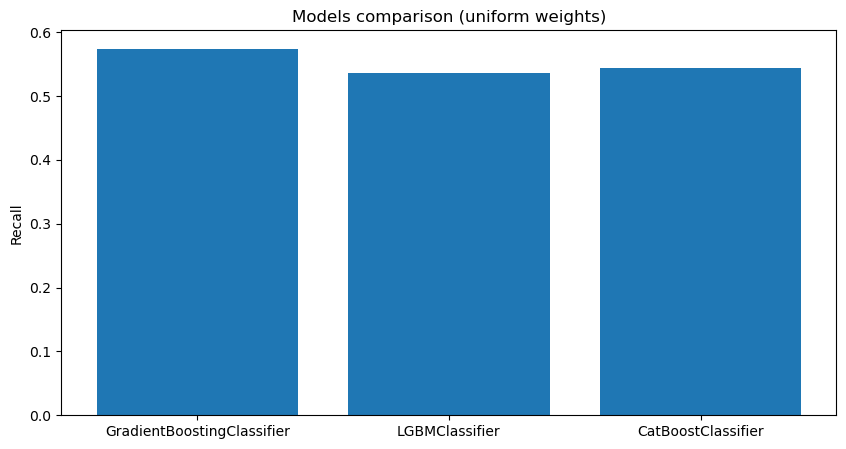

GradientBoostingClassifier: 0.5741666666666667
LGBMClassifier: 0.5358333333333334
CatBoostClassifier: 0.5433791666666666


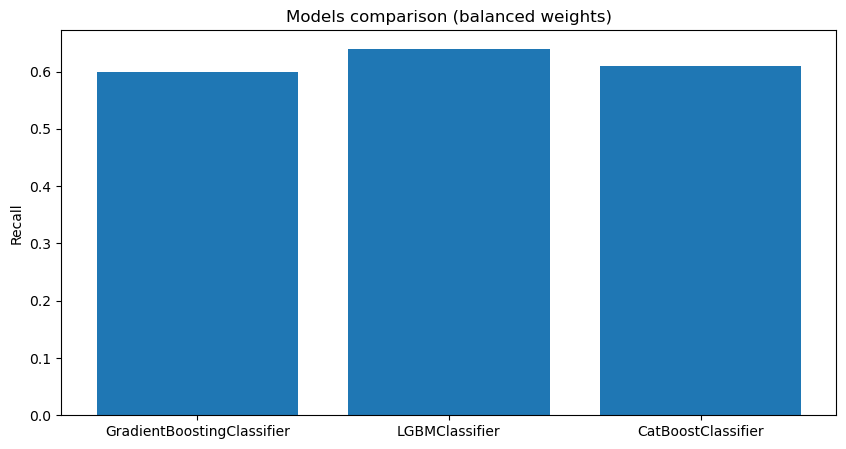

GradientBoostingClassifier: 0.6
LGBMClassifier: 0.64
CatBoostClassifier: 0.6094883333333333


In [11]:
# List of estimators to test
estimators = [
    GradientBoostingClassifier(random_state=seed),
    LGBMClassifier(random_state=seed, verbose=-1),
    CatBoostClassifier(random_seed=seed)
]

class_weights = [None, 'balanced']

for w in class_weights:
    weights = compute_class_weight(w, classes=np.unique(y_train), y=y_train) # Calculate weights
    sample_weights = [weights[i] for i in y_train]
    results_dict = {} # Dict to store results
    
    for est in estimators:
        model_name = type(est).__name__
        if model_name == 'CatBoostClassifier':

            cat_features = [
                'anaemia', 'diabetes', 
                'high_blood_pressure', 
                'sex', 'smoking'
            ]

            cv_dataset = Pool(data=x_train,
                              label=y_train,
                              cat_features=cat_features)

            params = {
                'loss_function': 'Logloss',
                'eval_metric': 'Recall',
                'class_weights': weights,
                'random_seed': seed,
                'verbose': False
            }

            scores = cv(cv_dataset, 
                        params, 
                        fold_count=5,
                        partition_random_seed=seed,
                        logging_level='Silent')['test-Recall-mean']

        else:

            scores = cross_val_score(est, 
                                     x_train, 
                                     y_train, 
                                     scoring='recall', 
                                     fit_params={'sample_weight': sample_weights}, 
                                     cv=5, verbose=False)

        score = abs(scores.mean())
        results_dict[model_name] = score

    names = list(results_dict.keys())
    values = list(results_dict.values())
    
    # Visualize results
    plt.figure(figsize=(10,5))
    if w == None:
        plt.title(f'Models comparison (uniform weights)')
    else:
        plt.title(f'Models comparison ({w} weights)')
    plt.bar(range(len(results_dict)), results_dict.values(), tick_label=list(results_dict.keys()))
    plt.ylabel('Recall')
    plt.show();
    for key, value in results_dict.items():
        print(key+':', value)

As we might see on graphs, balancing the weights helps us achieve better results.

### Hyperparameters tuning

In [12]:
# Dict to store results
results_dict = {}


# RS function
def rs(est, params, cv=3, n_iter=1000):
    rs_cv = RandomizedSearchCV(est,
                               params, 
                               cv=cv, 
                               n_iter=n_iter, 
                               n_jobs=-1, 
                               verbose=1, 
                               scoring='recall',
                               random_state=seed)
    rs_cv.fit(x_train,y_train, sample_weight=sample_weights)
    rs_df = pd.DataFrame(rs_cv.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
    
    return rs_df


# Visualize RS results
def build_graphs(rs_df, params_list, figsize=(10,10)):
    rs_df['mean_test_score'] = rs_df['mean_test_score'] - rs_df['mean_test_score'].min()
    nrows = math.ceil(len(params_list)/2)
    fig, axs = plt.subplots(ncols=2, nrows=nrows, figsize=figsize)
    row = 0
    col = 0
    for param in params_list:
        try:
            rs_df[f'param_{param}'] = rs_df[f'param_{param}'].astype('float').round(2)
        except: None
        sns.barplot(x=f'param_{param}', y='mean_test_score', data=rs_df, ax=axs[row,col])
        axs[row,col].set_title(label = param)
        axs[row,col].set_xlabel('')
        col += 1
        if col == 2:
            col = 0
            row += 1
    plt.show();


# GS function
def gs(est, params, results_dict, cv=3):
    gs_cv = GridSearchCV(est,
                         params, 
                         cv=cv,
                         n_jobs=-1,
                         scoring='recall',
                         verbose=3)
    gs_cv.fit(x_train,y_train, sample_weight=sample_weights)
    model_name = type(est).__name__
    best_score = gs_cv.best_score_
    print(f'Best score: {best_score}')
    results_dict[model_name] = best_score
    return gs_cv.best_estimator_

#### GradientBoostingClassifier

In [13]:
estimator = GradientBoostingClassifier()

rs_params = {
    'learning_rate': np.arange(0.01, 0.11, 0.01),
    'n_estimators': range(60, 201, 20),
    'subsample': np.arange(0.1, 1.1, 0.1),
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_split': range(2, 13),
    'min_samples_leaf': range(1, 10),
    'max_depth': range(2, 11),
    'warm_start': [True, False],
    'random_state': [seed]
}

rs_df = rs(estimator, rs_params)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


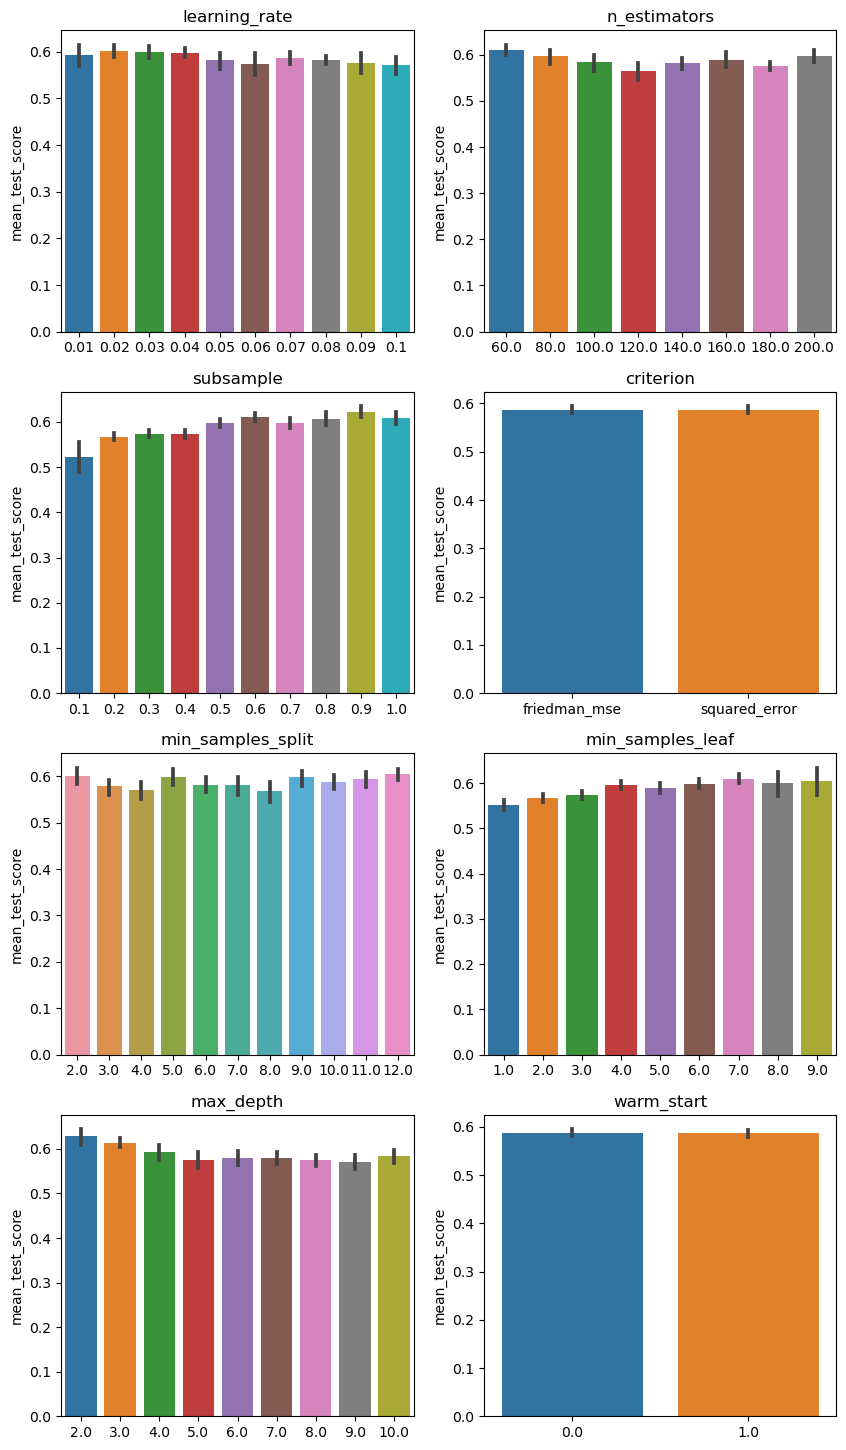

In [14]:
params_list = ['learning_rate', 
               'n_estimators', 
               'subsample',
               'criterion',
               'min_samples_split',
               'min_samples_leaf',
               'max_depth',
               'warm_start']

build_graphs(rs_df, params_list, figsize=(10,18))

In [15]:
gs_params = {
    'learning_rate': np.arange(0.01, 0.05, 0.01),
    'n_estimators': range(60, 80, 5),
    'subsample': [0.8, 0.9, 1],
    'min_samples_split': [2, 5, 9, 12],
    'min_samples_leaf': range(7, 11),
    'max_depth': range(2, 5),
    'random_state': [seed]
}

best_estimator_gbc = gs(estimator, gs_params, results_dict)

Fitting 3 folds for each of 2304 candidates, totalling 6912 fits
Best score: 0.817948717948718


#### LGBMClassifier

In [16]:
estimator = LGBMClassifier()

rs_params = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [5, 15, 30, 50],
    'max_depth': range(-1, 11),
    'learning_rate': np.arange(0.01, 0.11, 0.01),
    'n_estimators': range(60, 141, 20),
    'min_child_samples': range(1, 32, 5),
    'subsample': np.arange(0.1, 1.1, 0.1),
    'colsample_bytree': np.arange(0.1, 1.1, 0.1),
    'reg_alpha': np.arange(0, 5.1, 0.5),
    'reg_lambda': np.arange(0, 5.1, 0.5),
    'verbose':[-1],
    'random_state': [seed]
}

rs_df = rs(estimator, rs_params)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


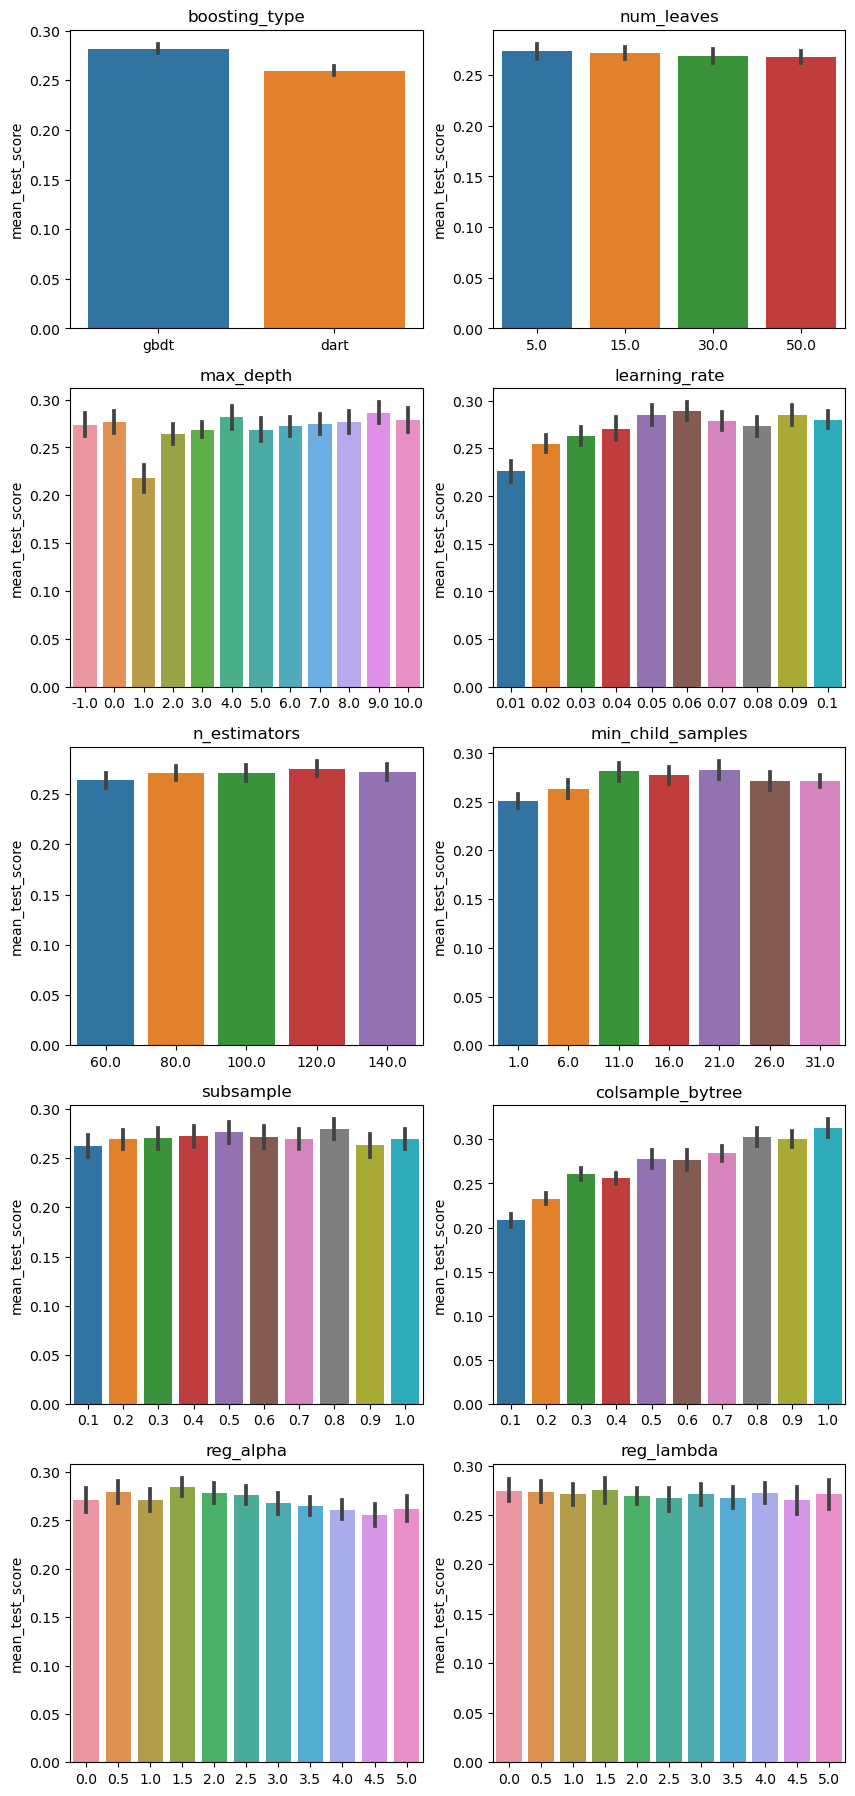

In [17]:
params_list = ['boosting_type',
               'num_leaves',
               'max_depth',
               'learning_rate', 
               'n_estimators', 
               'min_child_samples',
               'subsample',
               'colsample_bytree',
               'reg_alpha',
               'reg_lambda']

build_graphs(rs_df, params_list, figsize=(10,22.5))

In [18]:
gs_params = {
    'boosting_type': ['gbdt'],
    'num_leaves': range(2, 6),
    'max_depth': [4, 8, 9],
    'learning_rate': np.arange(0.05, 0.08, 0.01),
    'n_estimators': [120],
    'min_child_samples': [11, 12, 20, 21],
    'subsample': [0.5, 0.8],
    'reg_alpha': np.arange(1.5, 2.0, 0.1),
    'reg_lambda': [0, 0.5, 1.5],
    'verbose':[-1],
    'random_state': [seed]
}

best_estimator_lgbm = gs(estimator, gs_params, results_dict)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits
Best score: 0.8312820512820512


#### CatBoostClassifier

In [19]:
estimator = CatBoostClassifier()

rs_params = {
    'iterations': range(100, 201, 20),
    'learning_rate': np.arange(0.01, 0.11, 0.01),
    'depth': range(1, 11),
    'l2_leaf_reg': np.arange(0.01, 0.11, 0.01),
    'loss_function': ['Logloss', 'CrossEntropy'],
    'subsample': np.arange(0.1, 1.1, 0.1),
    'colsample_bylevel': np.arange(0.1, 1.1, 0.1),
    'min_data_in_leaf': np.arange(1, 57, 5),
    'verbose':[0],
    'random_seed': [seed]
}

rs_df = rs(estimator, rs_params)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


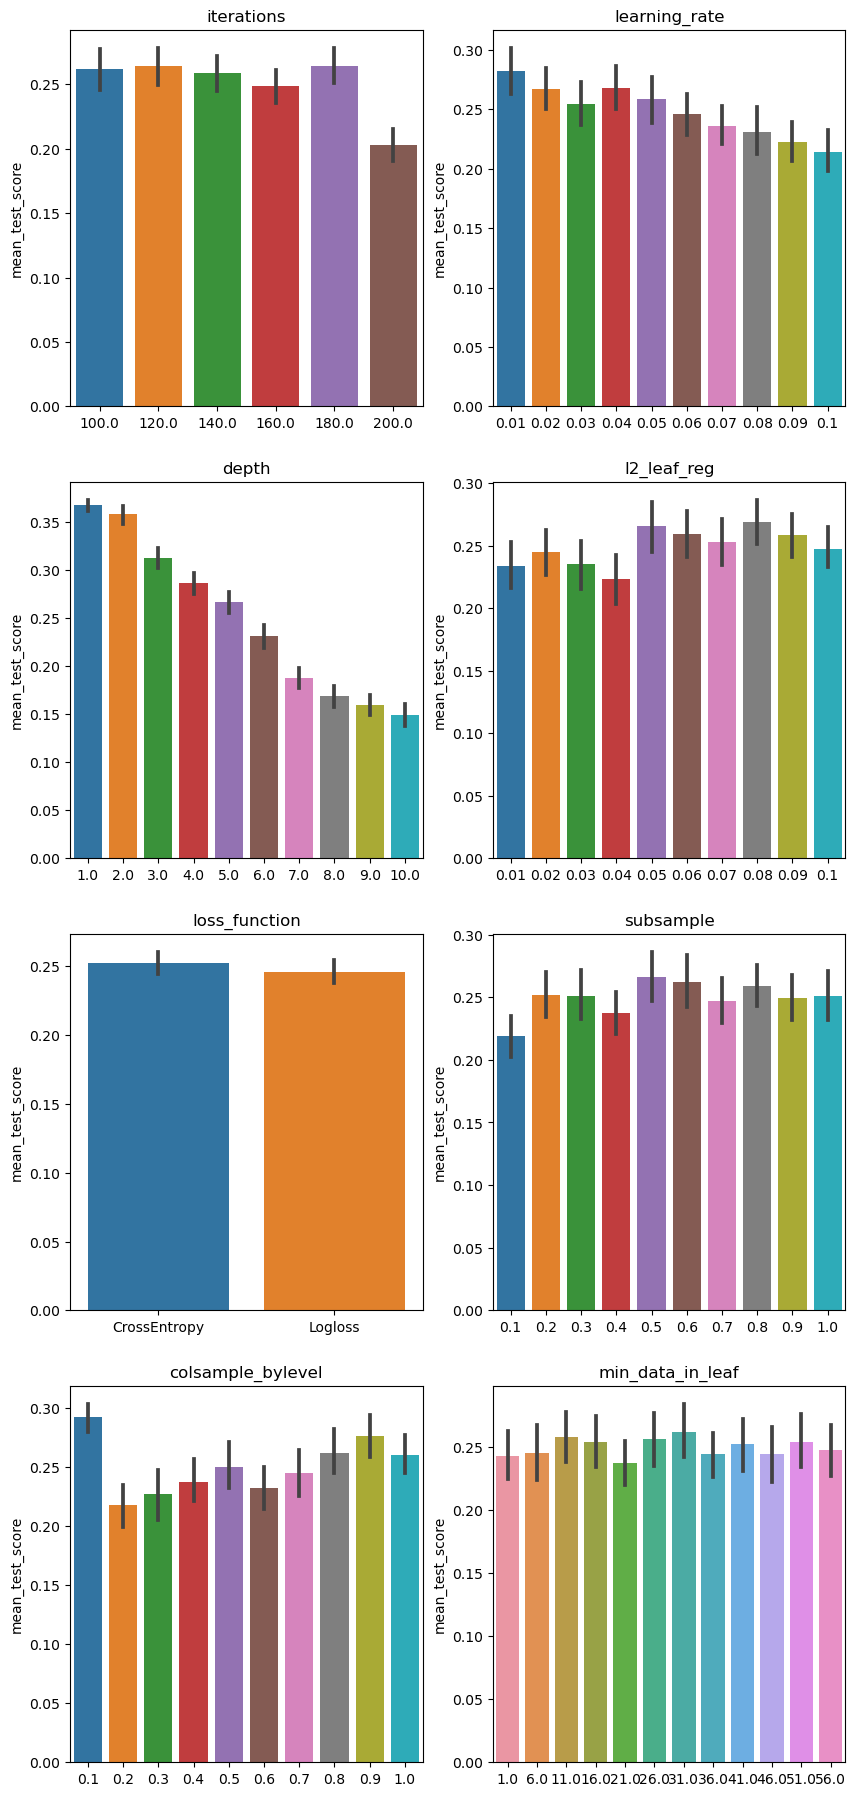

In [20]:
params_list = ['iterations',
               'learning_rate',
               'depth',
               'l2_leaf_reg', 
               'loss_function', 
               'subsample',
               'colsample_bylevel',
               'min_data_in_leaf']

build_graphs(rs_df, params_list, figsize=(10,22.5))

In [21]:
gs_params = {
    'iterations': range(100, 121, 5),
    'learning_rate': [0.01],
    'depth': range(1, 4),
    'l2_leaf_reg': np.arange(0.05, 0.09, 0.01),
    'loss_function': ['CrossEntropy'],
    'subsample': np.arange(0.5, 0.9),
    'colsample_bylevel': [0.1, 0.9],
    'min_data_in_leaf': np.arange(2, 10),
    'verbose':[0],
    'random_seed': [seed]
}

best_estimator_cb = gs(estimator, gs_params, results_dict)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits
Best score: 0.7789743589743591


We see that hyperparameter-tuned LGBMClassifier achieves good recall score results.

#### Results comparsion

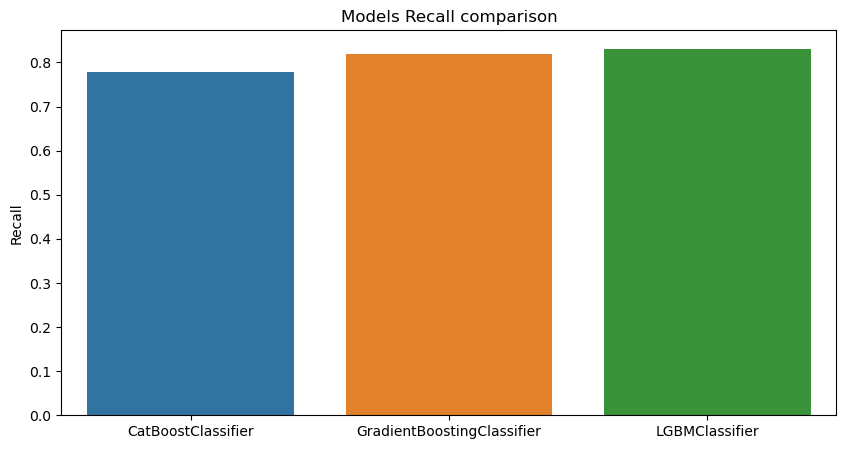

GradientBoostingClassifier Best Recall = 0.82
LGBMClassifier Best Recall = 0.83
CatBoostClassifier Best Recall = 0.78


In [22]:
lists = sorted(results_dict.items())
names, values = zip(*lists)

plt.figure(figsize=(10,5))
plt.title(f'Models Recall comparison')
sns.barplot(x=list(names), y=list(values))
plt.ylabel('Recall')
plt.show()
for name in results_dict.keys():
    print(f'{name} Best Recall = {round(results_dict[name], 2)}')

As we can see in the graph, LGBMClassifier performs slightly better than GradientBoostingClassifier, while CatBoostClassifier lags significantly behind the competition.

### Final model test

Now let's check LGBMClassifiers metrics and compare results to Dummy Classifier. We will check:
1) `balanced accuracy` and `f1` to see overall performance, 
2) `recall` to check on how well our model identifies fatalities 
3) `AUC ROC` to see how well our model explains the data.

In [35]:
# Results dict
results_dict = {}

def print_metrics(estimator, results_dict):
    y_pred = estimator.predict(x_test)
    
    acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    aucroc = roc_auc_score(y_test, y_pred)
    
    model_name = type(estimator).__name__
    results_dict[model_name] = {
        'Accuracy': acc,
        'F1': f1,
        'Recall': rec,
        'ROC AUC': aucroc
    }
    
    print(f'Accuracy on test: {round(acc, 2)}')
    print(f'F1 on test: {round(f1, 2)}')
    print(f'Recall on test: {round(rec, 2)}')
    print(f'ROC AUC на test: {round(aucroc, 2)}')

Starting with our models metrics:

In [40]:
model = best_estimator_lgbm

print_metrics(model, results_dict)

Accuracy on test: 0.68
F1 on test: 0.58
Recall on test: 0.68
ROC AUC на test: 0.68


And following metrics for Dummy Classifier with `strategy='uniform'`:

In [41]:
model = DummyClassifier(strategy='uniform', random_state=seed).fit(x_train, y_train)

print_metrics(model, results_dict)

Accuracy on test: 0.53
F1 on test: 0.45
Recall on test: 0.68
ROC AUC на test: 0.53


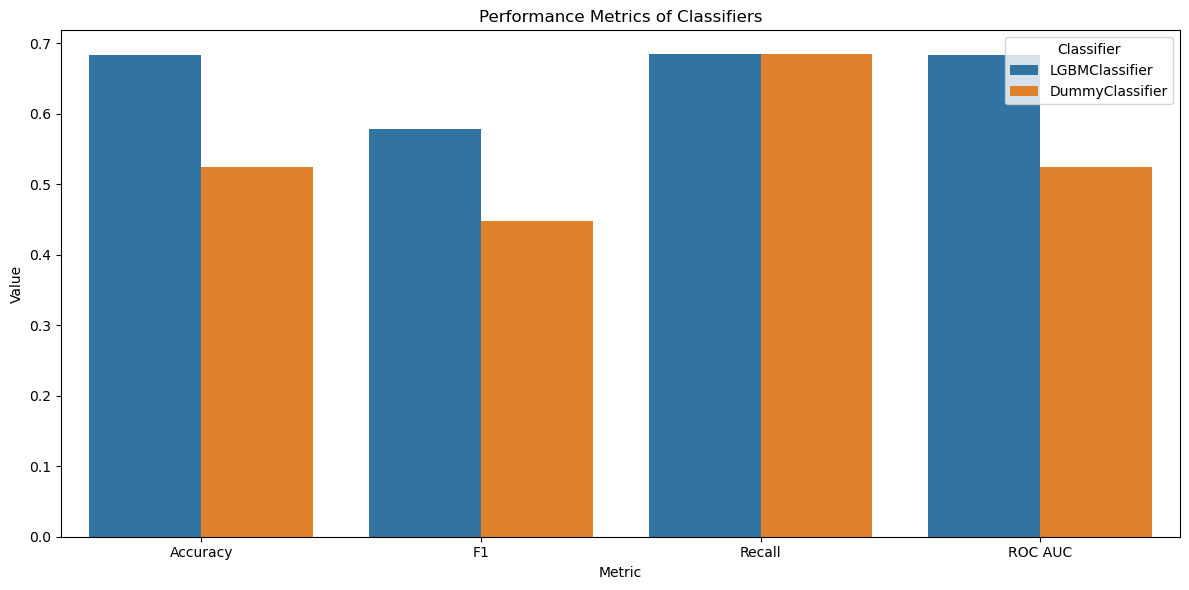

In [42]:
# Convert dictionary to DataFrame
df = pd.DataFrame(results_dict).reset_index()
df = df.rename(columns={'index': 'Metric'})

# Melt dataframe
df_melted = df.melt(id_vars='Metric', value_name='Value', var_name='Classifier')

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Metric', y='Value', hue='Classifier')
plt.title('Performance Metrics of Classifiers')
plt.tight_layout()
plt.show()

As we see our LGBM model is doing well on small and imbalanced dataset.

## Conclusion

The significance of machine learning in the realm of healthcare cannot be overstated. As our healthcare data continues to grow exponentially, the conventional methods of data analysis prove to be inadequate and often inefficient. Machine learning, with its advanced algorithms and capacity to handle vast amounts of data, offers a paradigm shift.

Predicting health failure fatality cases is a prime example of the invaluable role machine learning can play. Early prediction can lead to timely interventions, reducing mortality rates and improving the overall quality of life for patients. By extracting patterns and insights from a multitude of data points—including medical histories, real-time monitoring, and genetic information—machine learning models can offer predictions with remarkable accuracy. This not only benefits patients but also aids healthcare professionals in devising more effective treatment plans, allocating resources more efficiently, and potentially saving countless lives.

Moreover, the continuous evolution and improvement of these algorithms makes them even more refined and accurate over time. As we continue to integrate machine learning into our healthcare systems, its importance in predicting various other medical applications will undoubtedly become even more apparent. Embracing this technology is not just about advancing medical science—it's about enhancing the quality of human life.